## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline


# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

"""
建立神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)

    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""

LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping


_patience = [10, 25]
results = {}

"""
monitor: 監控的數據接口，有’acc’,’val_acc’,’loss’,’val_loss’等等。正常情况下如果有驗證集，就用’val_acc’或者’val_loss’
patience：能夠容忍多少个epoch内都没有improvement
mode: 就’auto’, ‘min’, ‘,max’三个可能
"""
for p in _patience:
    
    earlystop = EarlyStopping(monitor="val_loss", 
                              patience=p, 
                              verbose=1
                              )





    
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,
          callbacks=[earlystop]
         )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    name_tag = 'patience_%.2f' % p
    results[str(name_tag)] = {'train-loss': train_loss,
                           'valid-loss': valid_loss,
                           'train-acc': train_acc,
                           'valid-acc': valid_acc}


W0719 18:46:37.026087  7836 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0719 18:46:37.347239  7836 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0719 18:46:37.449486  7836 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0719 18:46:37.710831  7836 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0719 18:46:37.740524  7836 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


W0719 18:46:38.040717  7836 deprecation.py:323] From C:\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0719 18:46:38.212058  7836 deprecation_wrapper.py:119] From C:\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 8s 162us/step - loss: 2.2096 - acc: 0.1890 - val_loss: 2.0866 - val_acc: 0.2608
Epoch 2/50
50000/50000 [==============================] - 7s 136us/step - loss: 2.0130 - acc: 0.2934 - val_loss: 1.9519 - val_acc: 0.3132
Epoch 3/50
50000/50000 [==============================] - 7s 131us/step - loss: 1.9119 - acc: 0.3306 - val_loss: 1.8813 - val_acc: 0.3427
Epoch 4/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.8565 - acc: 0.3515 - val_loss: 1.8398 - val_acc: 0.3601
Epoch 5/50
50000/50000 [==============================] - 7s 132us/step - loss: 1.8190 - acc: 0.3663 - val_loss: 1.8059 - val_acc: 0.3728
Epoch 6/50
50000/50000 [==============================] - 6s 129us/step - loss: 1.7891 - acc: 0.3776 - val_loss: 1.7787 - val_acc: 0.3826
Epoch 7/50
50000/50000 [==============================] - 7s 143us/step - loss: 1.7628 - acc: 0.3851 - val_loss: 1.7556 - 

50000/50000 [==============================] - 9s 171us/step - loss: 2.0437 - acc: 0.2796 - val_loss: 1.9840 - val_acc: 0.2999
Epoch 3/50
50000/50000 [==============================] - 7s 146us/step - loss: 1.9395 - acc: 0.3157 - val_loss: 1.9033 - val_acc: 0.3287
Epoch 4/50
50000/50000 [==============================] - 7s 150us/step - loss: 1.8765 - acc: 0.3426 - val_loss: 1.8550 - val_acc: 0.3508
Epoch 5/50
50000/50000 [==============================] - 8s 164us/step - loss: 1.8350 - acc: 0.3605 - val_loss: 1.8178 - val_acc: 0.3641
Epoch 6/50
50000/50000 [==============================] - 7s 142us/step - loss: 1.8032 - acc: 0.3717 - val_loss: 1.7896 - val_acc: 0.3799
Epoch 7/50
50000/50000 [==============================] - 7s 137us/step - loss: 1.7764 - acc: 0.3827 - val_loss: 1.7636 - val_acc: 0.3909
Epoch 8/50
50000/50000 [==============================] - 7s 138us/step - loss: 1.7527 - acc: 0.3918 - val_loss: 1.7427 - val_acc: 0.3997
Epoch 9/50
50000/50000 [=====================

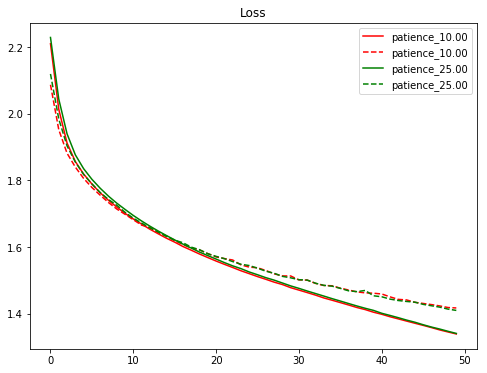

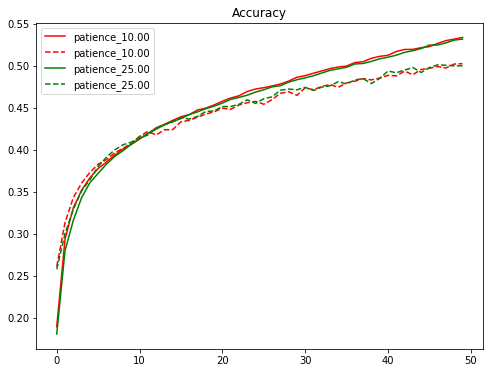

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""


color_bar = ["r", "g", "b"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()